## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17573 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential()

### Building Convolution Layer

In [6]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=1500,activation='relu'))

In [14]:
model.add(Dropout(0.4))

In [15]:
#output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Training Model

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 528s 235ms/step - loss: 1.3608 - accuracy: 0.6003 - val_loss: 0.7177 - val_accuracy: 0.7679
Epoch 2/10
2197/2197 [==============================] - 519s 236ms/step - loss: 0.4368 - accuracy: 0.8625 - val_loss: 0.2543 - val_accuracy: 0.9162
Epoch 3/10
2197/2197 [==============================] - 539s 245ms/step - loss: 0.2599 - accuracy: 0.9168 - val_loss: 0.3002 - val_accuracy: 0.9024
Epoch 4/10
2197/2197 [==============================] - 504s 229ms/step - loss: 0.1815 - accuracy: 0.9405 - val_loss: 0.1590 - val_accuracy: 0.9474
Epoch 5/10
2197/2197 [==============================] - 497s 226ms/step - loss: 0.1322 - accuracy: 0.9563 - val_loss: 0.1663 - val_accuracy: 0.9487
Epoch 6/10
2197/2197 [==============================] - 496s 226ms/step - loss: 0.1047 - accuracy: 0.9649 - val_loss: 0.1362 - val_accuracy: 0.9598
Epoch 7/10
2197/2197 [==============================] - 504s 229ms/step - loss: 0.0873 - accuracy: 0.9716 - val_

### Evaluating Model;

In [20]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 154s 70ms/step - loss: 0.0175 - accuracy: 0.9945


In [21]:
print(train_loss,train_acc)

0.017471598461270332 0.9945372939109802


In [22]:
#model evaluation on validation set
valid_loss,valid_acc = model.evaluate(validation_set)

550/550 [==============================] - 39s 70ms/step - loss: 0.0888 - accuracy: 0.9730


In [23]:
print(valid_loss,valid_acc)

0.08882033079862595 0.9729698896408081


### Saving The Model

In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'loss': [1.360794186592102,
  0.43679434061050415,
  0.2599385678768158,
  0.18145190179347992,
  0.1322445273399353,
  0.10473232716321945,
  0.08726104348897934,
  0.07248542457818985,
  0.06194989010691643,
  0.05561035871505737],
 'accuracy': [0.600256085395813,
  0.8625222444534302,
  0.9167508482933044,
  0.9405363202095032,
  0.9563269019126892,
  0.9648908376693726,
  0.9715911746025085,
  0.9759727120399475,
  0.9800696969032288,
  0.9824880957603455],
 'val_loss': [0.7176752686500549,
  0.25434941053390503,
  0.30024752020835876,
  0.15904021263122559,
  0.166253000497818,
  0.13617800176143646,
  0.11658623814582825,
  0.10141485184431076,
  0.19019190967082977,
  0.08882034569978714],
 'val_accuracy': [0.7678825259208679,
  0.9162351489067078,
  0.9024071097373962,
  0.9473624229431152,
  0.9487281441688538,
  0.9598247408866882,
  0.9638650417327881,
  0.9690434336662292,
  0.9433790445327759,
  0.9729698896408081]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Accuracy Visualization

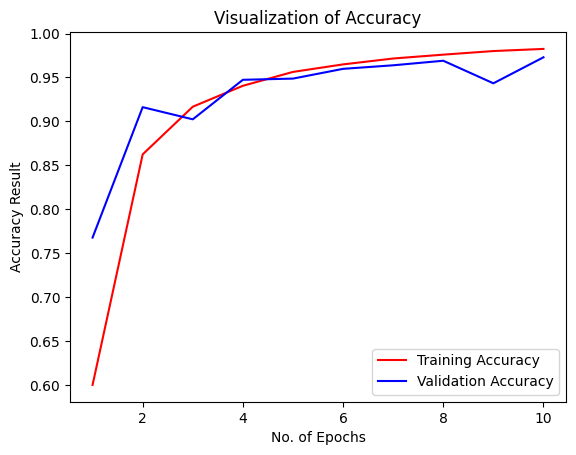

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()